In [8]:
# ! pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

d=datetime.datetime.today()
d=d.strftime('%m/%d/%Y')

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in cities_df.iterrows():
    city = row["City"]
    
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {index} | {city}")
        row["Cloudiness"] = response['clouds']['all']
        row["Country"] = response['sys']['country']
        row["Date"] = response['dt']
        row["Humidity"] = response['main']['humidity']
        row["Lat"] = response['coord']['lat']
        row["Lng"] = response['coord']['lon']
        row["Max Temp"] = response['main']['temp_max']
        row["Wind Speed"] = response['wind']['speed']
    except(KeyError):
        print("City not found. Skipping.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | manosque
Processing Record 1 | caravelas
Processing Record 2 | mataura
Processing Record 3 | rikitea
Processing Record 4 | laguna
Processing Record 5 | olafsvik
City not found. Skipping.
Processing Record 6 | talnakh
Processing Record 7 | atar
Processing Record 8 | katsuura
Processing Record 9 | ushuaia
Processing Record 10 | chuy
Processing Record 11 | providencia
Processing Record 12 | oistins
Processing Record 13 | bethel
Processing Record 14 | albany
Processing Record 15 | kapaa
Processing Record 16 | ambon
Processing Record 17 | zemio
Processing Record 18 | eureka
Processing Record 19 | vadso
Processing Record 20 | bambous virieux
Processing Record 21 | victoria
Processing Record 22 | taltal
Processing Record 23 | lensk
Processing Record 24 | illoqqortoormiut
City not found. Skipping.
Processing Record 25 | quesnel
Processing Record 26 | hilo
Processing Record 27 | maryborough
Processing Record 28 | busse

Processing Record 232 | khandyga
Processing Record 233 | bontang
Processing Record 234 | shelburne
Processing Record 235 | progreso
Processing Record 236 | teya
Processing Record 237 | cherskiy
Processing Record 238 | maine-soroa
Processing Record 239 | umzimvubu
City not found. Skipping.
Processing Record 240 | port-gentil
Processing Record 241 | geraldton
Processing Record 242 | vostok
Processing Record 243 | itarema
Processing Record 244 | half moon bay
Processing Record 245 | turayf
Processing Record 246 | aklavik
Processing Record 247 | bengkulu
City not found. Skipping.
Processing Record 248 | tumannyy
City not found. Skipping.
Processing Record 249 | zwedru
Processing Record 250 | altay
Processing Record 251 | buraydah
Processing Record 252 | san juan
Processing Record 253 | svetlograd
Processing Record 254 | kemijarvi
City not found. Skipping.
Processing Record 255 | muhos
Processing Record 256 | mandera
Processing Record 257 | kahului
Processing Record 258 | karratha
Processin

Processing Record 462 | aksay
Processing Record 463 | port augusta
Processing Record 464 | eyrarbakki
Processing Record 465 | temaraia
City not found. Skipping.
Processing Record 466 | ixtapa
Processing Record 467 | kolpny
Processing Record 468 | malinovoye ozero
Processing Record 469 | puerto carreno
Processing Record 470 | bilibino
Processing Record 471 | neryungri
Processing Record 472 | yeppoon
Processing Record 473 | grand-lahou
Processing Record 474 | toora-khem
Processing Record 475 | the valley
Processing Record 476 | norman wells
Processing Record 477 | faanui
Processing Record 478 | khash
Processing Record 479 | peleduy
Processing Record 480 | yuzhnouralsk
Processing Record 481 | chapais
Processing Record 482 | bocas del toro
Processing Record 483 | freeport
Processing Record 484 | clonakilty
Processing Record 485 | teahupoo
Processing Record 486 | tabuk
Processing Record 487 | san angelo
Processing Record 488 | igarka
Processing Record 489 | makat
Processing Record 490 | moi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
cities_df.to_csv("Cities.csv", index=False)

In [12]:
# Remove empty rows
cities_df = cities_df[(cities_df.Country != '') & (cities_df.Date != '')]

# Convert data to numeric
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Date"] = pd.to_numeric(cities_df["Date"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])


#### Latitude vs. Temperature Plot

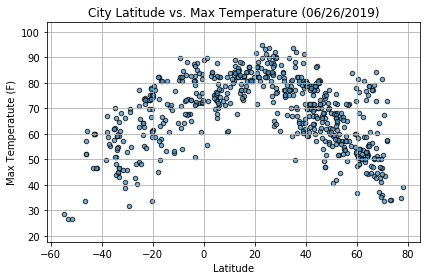

In [13]:
fig, ax = plt.subplots()

cities_df.plot(kind='scatter', x='Lat', y='Max Temp', ax=ax, 
           color="#4C92C3", edgecolors="black", alpha=0.75)
ax.grid()

ax.set_title(f"City Latitude vs. Max Temperature ({d})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperatute (F)")

plt.tight_layout()
plt.axis("equal")
plt.savefig("LatVsMaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

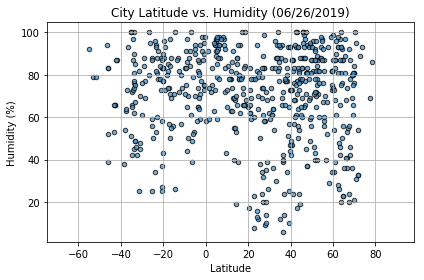

In [14]:
fig, ax = plt.subplots()

cities_df.plot(kind='scatter', x='Lat', y='Humidity', ax=ax, 
           color="#4C92C3", edgecolors="black", alpha=0.75)
ax.grid()

ax.set_title(f"City Latitude vs. Humidity ({d})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")

plt.tight_layout()
plt.axis("equal")
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

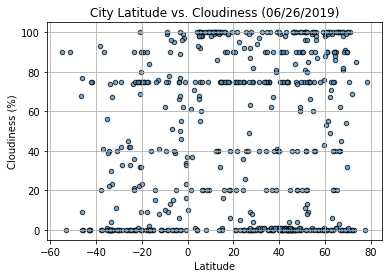

In [15]:
fig, ax = plt.subplots()

cities_df.plot(kind='scatter', x='Lat', y='Cloudiness', ax=ax, 
           color="#4C92C3", edgecolors="black", alpha=0.75)
ax.grid()

ax.set_title(f"City Latitude vs. Cloudiness ({d})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")

#plt.tight_layout()
#plt.axis("equal")
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

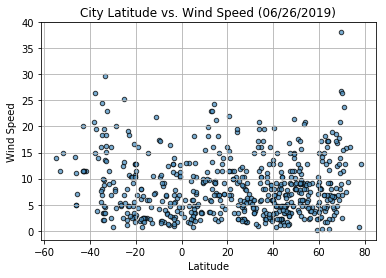

In [16]:
fig, ax = plt.subplots()

cities_df.plot(kind='scatter', x='Lat', y='Wind Speed', ax=ax, 
           color="#4C92C3", edgecolors="black", alpha=0.75)
ax.grid()

ax.set_title(f"City Latitude vs. Wind Speed ({d})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")

# plt.tight_layout()
# plt.axis("equal")
# plt.savefig("LatVsWindSpeed.png")
# plt.show()